In [20]:
from rastermap import Rastermap
from scipy import stats 

# this function performs a running average filter over the first dimension of X
# (faster than doing gaussian filtering)
def running_average(X, nbin = 100):
    Y = np.cumsum(X, axis=0)
    Y = Y[nbin:, :] - Y[:-nbin, :]
    return Y

In [6]:
dir='/home/matt/creb/CREB9/mjd537/20180618-RF-MJD4-1-1-2/mjd537-20180618-RF-MJD4-1-1-2-001_wiener_denoised.sima/s2p/suite2p/plane0'

In [40]:
dir='/home/matt/creb/CREB7/mjd526/20180422-HR-1-1-1/mjd526-20180422-HR-1-1-1-001_wiener_denoised.sima/s2p/suite2p/plane0'

In [71]:
S = np.load(f'{dir}/spks.npy')
stat = np.load(f'{dir}/stat.npy', allow_pickle=True)

# get roi position
ypos = np.array([stat[n]['med'][0] for n in range(len(stat))]) 
xpos = np.array([stat[n]['med'][1] for n in range(len(stat))]) 
del stat

## plot roi position

Text(0, 0.5, 'Y position (um)')

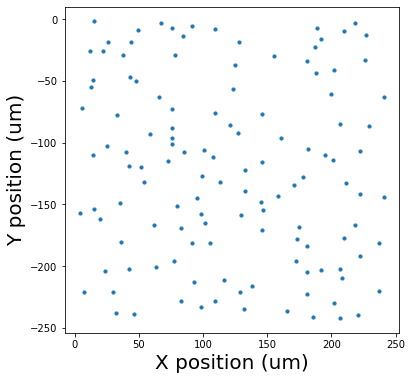

In [73]:
# POSITIONS OF ALL NEURONS
plt.figure(figsize=(6,6))
plt.scatter(xpos, -ypos, s = 10)
plt.xlabel('X position (um)', fontsize=20)
plt.ylabel('Y position (um)', fontsize=20)

## rastermap

In [42]:
model = Rastermap(n_components=1, n_X=30,nPC=200,init='pca').fit(S)

nmin 125
0.0026426315307617188
0.04945039749145508
0.05308723449707031
0.0538027286529541
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0606      2
0.01s    10        0.1899      4
0.03s    20        0.2886      8
0.04s    30        0.4444      18
0.05s    40        0.5779      28
0.06s    50        0.5781      28
0.07s   final      0.5781
0.07s upsampled    0.5781


In [66]:
# from https://github.com/MouseLand/rastermap/blob/master/tutorial/tutorial.ipynb

# the manifold embedding is in model.embedding
isort = np.argsort(model.embedding[:,0])


#Sfilt = running_average(S[isort, 2000:2500], 50)


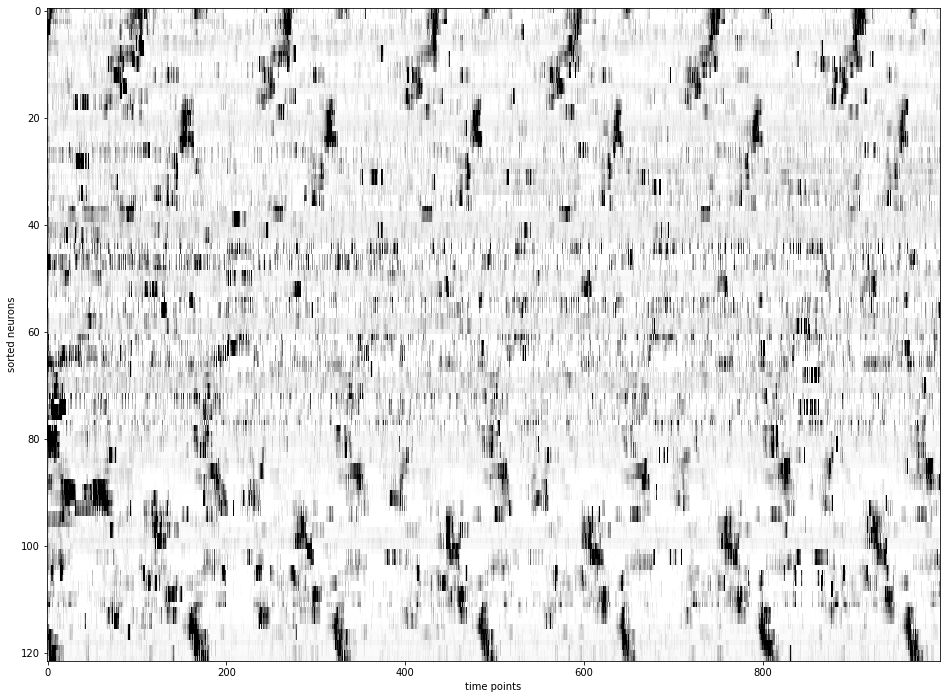

In [67]:
# sort by embedding and smooth over neurons
Sfilt = running_average(S[isort, 1:1000], 3)
Sfilt = stats.zscore(Sfilt, axis=1)

plt.figure(figsize=(16,12))
plt.imshow(Sfilt, vmin = -0.5, vmax=3, aspect='auto', cmap='gray_r')
plt.xlabel('time points')
plt.ylabel('sorted neurons')
plt.show()

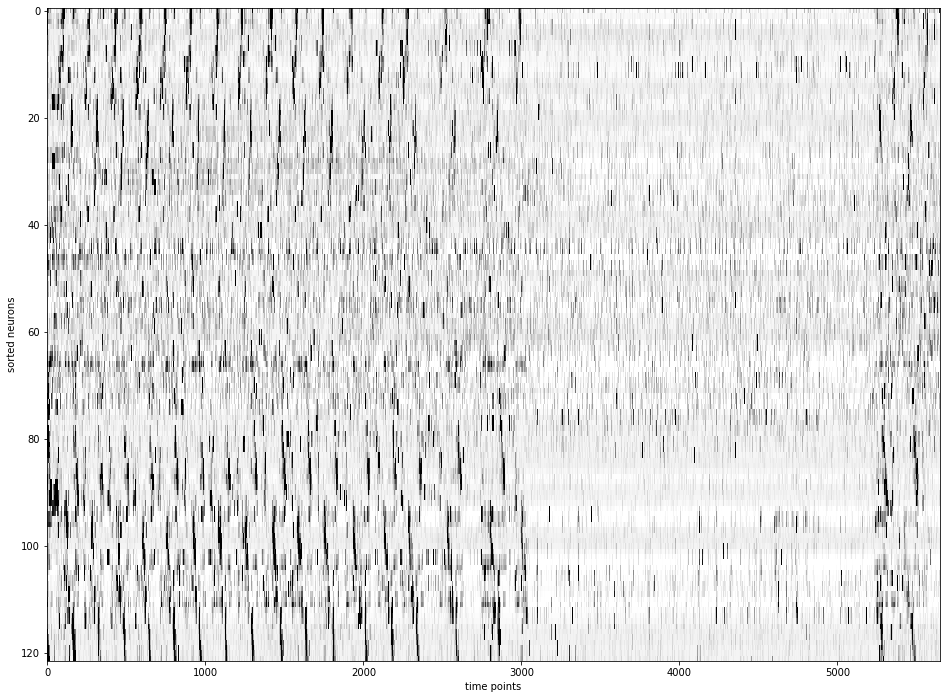

In [68]:
# sort by embedding and smooth over neurons
Sfilt = running_average(S[isort, :], 3)
Sfilt = stats.zscore(Sfilt, axis=1)

plt.figure(figsize=(16,12))
plt.imshow(Sfilt, vmin = -0.5, vmax=3, aspect='auto', cmap='gray_r')
plt.xlabel('time points')
plt.ylabel('sorted neurons')
plt.show()

## plot cells based on raster embedding

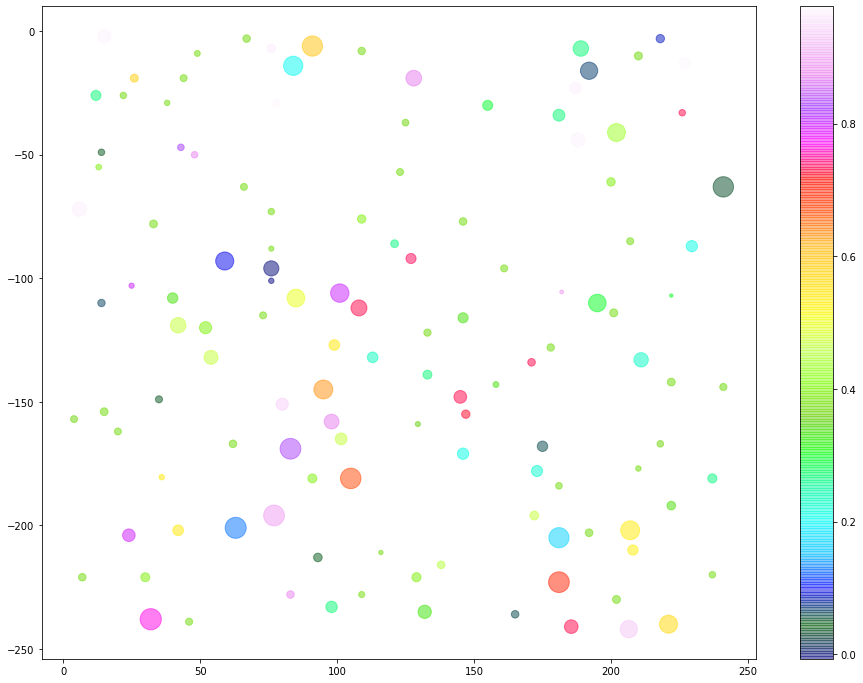

In [77]:
# HERE color cells according to their rastermap embedding
lam=model.lam
plt.figure(figsize=(16,12))
plt.scatter(xpos, -ypos, s=450*lam/np.max(lam), c=model.embedding[:,0], 
            cmap='gist_ncar', alpha = .5)
plt.colorbar()
plt.show()